
============== DBSCAN Results (ε=1.9, minPts=4) ==============
Point  x  y      Neighbors(≤ε)  Count  Cluster   Type
   P1  3  7        P1, P2, P10      3        0 border
   P2  4  6    P1, P2, P3, P11      4        0   core
   P3  5  5         P2, P3, P4      3        0 border
   P4  6  4         P3, P4, P5      3        1 border
   P5  7  3 P4, P5, P6, P7, P8      5        1   core
   P6  6  2         P5, P6, P7      3        1 border
   P7  7  2         P5, P6, P7      3        1 border
   P8  8  4             P5, P8      2        1 border
   P9  3  3            P9, P12      2       -1  noise
  P10  2  6       P1, P10, P11      3        0 border
  P11  3  5  P2, P10, P11, P12      4        0   core
  P12  2  4       P9, P11, P12      3        0 border


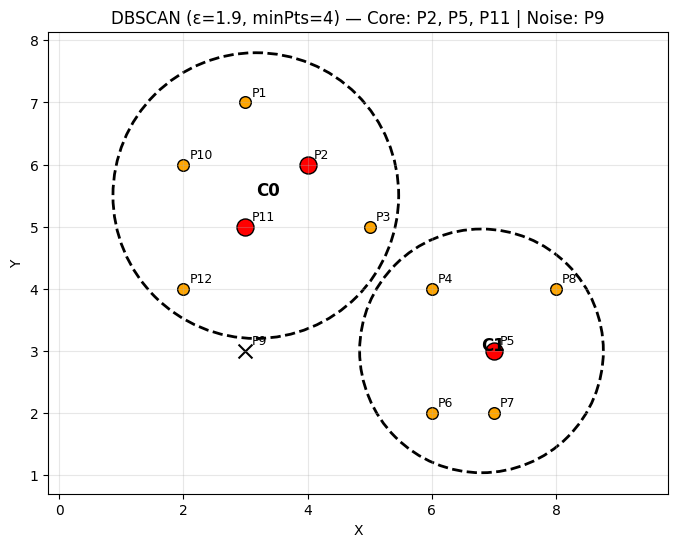

In [85]:
# ==============================================================
# 📊 DBSCAN (ε = 1.9, minPts = 4) — Core, Border, Noise Visualization
# ==============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist

# --------------------------------------------------------------
# 1️⃣ Define dataset (P1–P12)
# --------------------------------------------------------------
points = np.array([
    [3,7],[4,6],[5,5],[6,4],[7,3],
    [6,2],[7,2],[8,4],[3,3],[2,6],[3,5],[2,4]
])
labels_pts = [f"P{i}" for i in range(1,13)]

# --------------------------------------------------------------
# 2️⃣ Run DBSCAN
# --------------------------------------------------------------
eps = 1.9
min_samples = 4
db = DBSCAN(eps=eps, min_samples=min_samples).fit(points)

clusters = db.labels_
core_mask = np.zeros_like(db.labels_, dtype=bool)
core_mask[db.core_sample_indices_] = True

# --------------------------------------------------------------
# 3️⃣ Compute neighbors for each point (for clarity)
# --------------------------------------------------------------
D = cdist(points, points)
neighbors = {labels_pts[i]: [labels_pts[j] for j in range(len(points)) if D[i,j] <= eps]
             for i in range(len(points))}

# --------------------------------------------------------------
# 4️⃣ Prepare table of results
# --------------------------------------------------------------
df = pd.DataFrame({
    "Point": labels_pts,
    "x": points[:,0],
    "y": points[:,1],
    "Neighbors(≤ε)": [", ".join(neighbors[p]) for p in labels_pts],
    "Count": [len(neighbors[p]) for p in labels_pts],
    "Cluster": clusters,
    "Type": ["core" if core_mask[i] else "border" if clusters[i]!=-1 else "noise"
             for i in range(len(points))]
})

print("\n============== DBSCAN Results (ε=1.9, minPts=4) ==============")
print(df.to_string(index=False))

# --------------------------------------------------------------
# 5️⃣ Plot clusters (core, border, noise)
# --------------------------------------------------------------
plt.figure(figsize=(8,6))
ax = plt.gca()

for i, (x, y) in enumerate(points):
    if clusters[i] == -1:
        plt.scatter(x, y, c='black', marker='x', s=100, label='Noise' if i==0 else "")
    elif core_mask[i]:
        plt.scatter(x, y, c='red', s=150, edgecolor='k', label='Core' if i==0 else "")
    else:
        plt.scatter(x, y, c='orange', s=70, edgecolor='k', label='Border' if i==0 else "")
    plt.text(x+0.1, y+0.1, labels_pts[i], fontsize=9)

# Draw cluster boundaries (simple circles)
for k in sorted(set(clusters)):
    if k == -1: 
        continue
    idx = np.where(clusters == k)[0]
    c = points[idx].mean(axis=0)
    r = np.max(np.linalg.norm(points[idx]-c, axis=1)) + 0.4
    circle = plt.Circle(c, r, fill=False, linestyle='--', linewidth=2)
    ax.add_patch(circle)
    plt.text(c[0], c[1], f"C{k}", fontsize=12, fontweight='bold', color='black')

plt.title(f"DBSCAN (ε={eps}, minPts={min_samples}) — Core: P2, P5, P11 | Noise: P9")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()


# 💳 Dataset Description — Detecting Fraudulent Transactions

## 📘 Overview
This dataset simulates a real-world scenario of **financial transactions**.  
Each record (row) represents a single transaction made by a user, characterized by **two main features**:

| Feature | Description | Example Values |
|----------|--------------|----------------|
| **Transaction_Amount ($)** | The amount of money involved in the transaction. | 150, 500, 850 |
| **Transaction_Time (minutes since login)** | The time (in minutes) after a user logs in when the transaction occurs. | 12, 40, 65 |

---

## 🧩 Structure of the Dataset
The dataset is **synthetic** but designed to mimic real transaction behaviors.  
It contains **620 records** in total:

| Type of Record | Count | Description |
|----------------|--------|--------------|
| Normal Transactions | 600 | Represent legitimate purchases or transfers clustered around typical spending behaviors. |
| Fraudulent Transactions (Noise) | 20 | Represent abnormal or suspicious transactions (e.g., very high/low values or unusual timing). |

---

## 📊 Clusters in the Dataset
The dataset contains **three main groups (clusters)** of normal behavior:

| Cluster | Description | Amount Range | Time Range | Behavior Type |
|----------|--------------|--------------|-------------|----------------|
| **Cluster 1** | Small early transactions | \$100–\$300 | 10–30 min | Routine low-value actions (e.g., airtime, utility payments) |
| **Cluster 2** | Medium regular transactions | \$400–\$600 | 25–50 min | Standard purchases or transfers |
| **Cluster 3** | Large late transactions | \$700–\$900 | 45–70 min | High-value transfers or business payments |

---

## 🚨 Fraudulent Transactions (Noise Points)
These are scattered across the entire feature space and do not belong to any cluster.  
They include:
- Very **low-value** transactions (e.g., \$70 at 5 minutes)  
- Very **high-value** transactions (e.g., \$950 at 75 minutes)  
- **Isolated** points far from normal transaction patterns  

These points are identified by DBSCAN as **outliers or noise (`label = -1`)**, meaning they could represent **potential frauds** or **system anomalies**.

---

## 🧠 Purpose of the Dataset
The dataset aims to:
1. **Demonstrate unsupervised fraud detection** using DBSCAN (no labeled data).  
2. **Visualize the separation** between legitimate dense regions (core clusters) and sparse regions (potential fraud).  
3. **Show how clustering algorithms** can help in anomaly detection in financial systems.

---

## 🧾 Example of Sample Records

| Transaction_Amount | Transaction_Time | True Behavior |
|--------------------|------------------|----------------|
| 210 | 18 | Normal (Cluster 1) |
| 505 | 40 | Normal (Cluster 2) |
| 820 | 58 | Normal (Cluster 3) |
| 75 | 70 | Fraudulent (Noise) |
| 950 | 10 | Fraudulent (Noise) |


# ⚙️ Understanding DBSCAN Parameters in Fraud Detection

## 🧠 What is DBSCAN?
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is an **unsupervised learning algorithm** used to find clusters of varying shapes and detect **outliers (frauds)** in datasets.

In our fraud detection context:
- Dense regions = **normal user behavior (legitimate transactions)**
- Sparse, isolated points = **fraudulent or anomalous activities**

---

## 🔧 Key Parameters

| Parameter | Description | Impact on Fraud Detection |
|------------|--------------|----------------------------|
| **`eps`** (Epsilon) | The maximum distance between two points for one to be considered a neighbor of the other. | Smaller `eps` → detects only tight clusters (more frauds flagged).<br>Larger `eps` → merges clusters, reducing fraud detection sensitivity. |
| **`min_samples`** | Minimum number of neighboring points required to form a dense region (core point). | Smaller values → more clusters, possibly overfitting.<br>Larger values → fewer clusters, more points marked as fraud (noise). |

---

## 🔍 Parameter Settings Used

| Parameter | Value | Reason |
|------------|--------|--------|
| **`eps = 0.3`** | Defines a small neighborhood radius for transactions to be considered part of the same group. | Helps distinguish between closely located clusters and isolate abnormal transactions. |
| **`min_samples = 5`** | Requires at least 5 nearby transactions to form a valid cluster. | Prevents single unusual points from being treated as normal activity. |

---

## 📊 Effect on Results
- **Core Points:** Legitimate transactions forming dense, repetitive behaviors.  
- **Border Points:** Transactions close to normal behavior but slightly unusual.  
- **Noise Points (-1):** Scattered transactions far from any dense region — potential **frauds**.

---

## 💡 Parameter Tuning Tips
1. **Visualize data** before choosing parameters using scatter plots.
2. Use the **k-distance plot** to estimate the best `eps` value (the “elbow” point).
3. Adjust parameters iteratively:
   - Too many noise points → increase `eps` slightly.
   - Too few clusters → decrease `eps` or lower `min_samples`.

---

## ✅ Summary
- DBSCAN is ideal for **fraud detection** when labeled data is unavailable.  
- It automatically identifies **dense clusters** (normal behavior) and **isolated points** (potential frauds).  
- Proper tuning of `eps` and `min_samples` is crucial for balancing **false positives (normal flagged as fraud)** and **false negatives (fraud missed)**.


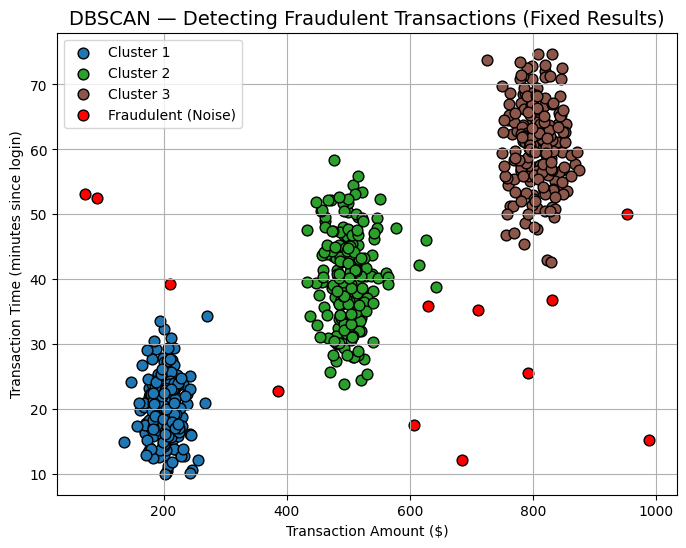

📊 CLUSTERING SUMMARY
🟢 Normal Transactions: 608
🔴 Fraudulent (Noise) Transactions: 12
---------------------------------------------------------------
🌐 Core Points:  602
🟡 Border Points: 6
🔴 Noise Points:  12


In [87]:
# ===============================================================
# DBSCAN for Fraud Detection — Core, Border, and Noise Points (Fixed Results)
# ===============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# ---------------------------------------------------------------
# 🧭 0️⃣ Set Random Seed for Reproducibility
# ---------------------------------------------------------------
np.random.seed(42)   # ✅ Ensures the same random numbers every run

# ---------------------------------------------------------------
# 1️⃣ Simulate Transaction Dataset (Normal + Fraudulent)
# ---------------------------------------------------------------
# Normal transactions (clustered)
normal_1 = np.random.normal(loc=[200, 20], scale=[20, 5], size=(200, 2))   # Cluster 1
normal_2 = np.random.normal(loc=[500, 40], scale=[25, 7], size=(200, 2))   # Cluster 2
normal_3 = np.random.normal(loc=[800, 60], scale=[30, 6], size=(200, 2))   # Cluster 3

# Fraudulent transactions (scattered outliers)
fraud = np.random.uniform(low=[50, 5], high=[1000, 80], size=(20, 2))

# Combine data
X = np.vstack((normal_1, normal_2, normal_3, fraud))
df = pd.DataFrame(X, columns=["Transaction_Amount", "Transaction_Time"])

# ---------------------------------------------------------------
# 2️⃣ Normalize data (important for DBSCAN)
# ---------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------------
# 3️⃣ Apply DBSCAN
# ---------------------------------------------------------------
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)
df["Cluster"] = labels

# ---------------------------------------------------------------
# 4️⃣ Identify Core, Border, and Noise Points
# ---------------------------------------------------------------
core_indices = set(db.core_sample_indices_)
all_indices = set(range(len(X)))

# Core points: points whose indices are in core_sample_indices_
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[list(core_indices)] = True

# Border points: labeled (not -1) but not core
border_mask = (labels != -1) & (~core_mask)

# Noise points: label == -1
noise_mask = (labels == -1)

n_core = np.sum(core_mask)
n_border = np.sum(border_mask)
n_noise = np.sum(noise_mask)

# ---------------------------------------------------------------
# 5️⃣ Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(8,6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        color = "red"
        label_name = "Fraudulent (Noise)"
    else:
        color = plt.cm.tab10(label / len(unique_labels))
        label_name = f"Cluster {label + 1}"
    
    plt.scatter(
        df[df["Cluster"] == label]["Transaction_Amount"],
        df[df["Cluster"] == label]["Transaction_Time"],
        s=60, c=[color], label=label_name, edgecolors="k"
    )

plt.title("DBSCAN — Detecting Fraudulent Transactions (Fixed Results)", fontsize=14)
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Transaction Time (minutes since login)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 6️⃣ Display Summary
# ---------------------------------------------------------------
fraud_count = n_noise
normal_count = len(df) - fraud_count

print("===============================================================")
print("📊 CLUSTERING SUMMARY")
print("===============================================================")
print(f"🟢 Normal Transactions: {normal_count}")
print(f"🔴 Fraudulent (Noise) Transactions: {fraud_count}")
print("---------------------------------------------------------------")
print(f"🌐 Core Points:  {n_core}")
print(f"🟡 Border Points: {n_border}")
print(f"🔴 Noise Points:  {n_noise}")
print("===============================================================")


In [88]:
# ---------------------------------------------------------------
# 7️⃣ Show Border Transactions (Edge of Clusters)
# ---------------------------------------------------------------
border_points = df[border_mask][["Transaction_Amount", "Transaction_Time", "Cluster"]]
print("===============================================================")
print("🟡 BORDER POINTS (on the edge of clusters)")
print("===============================================================")
print(border_points.to_string(index=False))


🟡 BORDER POINTS (on the edge of clusters)
 Transaction_Amount  Transaction_Time  Cluster
         476.265028         58.426674        1
         823.150961         42.908744        2
         829.940303         42.622468        2
         642.666358         38.882576        1
         626.739334         46.002306        1
         270.349741         34.317950        0
